In [44]:
import numpy as np
from glob import glob
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Activation, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [45]:
sentences_training = []
classification_training = []

path='3000tweet/raw_texts/**/*.txt'

for sayi, tweetdosyasi in enumerate(glob(path, recursive=True)): 
    classification_training.append(tweetdosyasi.split("\\")[1]),
    sentences_training.append((open(tweetdosyasi, encoding="windows-1254").read().replace('\n', ' '))) 
    
words = []
for i in sentences_training:
    words.append(i.split())

In [46]:
word2vec_model = Word2Vec(words, size = 200, window = 5, min_count = 1, workers = 16, sample=0.01,  min_alpha=0.0001, negative=0)

token = Tokenizer()
token.fit_on_texts(sentences_training)
x = token.texts_to_sequences(sentences_training)
x = pad_sequences(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

encode = preprocessing.LabelEncoder()
y = encode.fit_transform(classification_training)
y = to_categorical(y)


INFO - 19:09:02: collecting all words and their counts
INFO - 19:09:02: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 19:09:02: collected 15320 word types from a corpus of 35370 raw words and 3000 sentences
INFO - 19:09:02: Loading a fresh vocabulary
INFO - 19:09:02: effective_min_count=1 retains 15320 unique words (100% of original 15320, drops 0)
INFO - 19:09:02: effective_min_count=1 leaves 35370 word corpus (100% of original 35370, drops 0)
INFO - 19:09:02: deleting the raw counts dictionary of 15320 items
INFO - 19:09:02: sample=0.01 downsamples 0 most-common words
INFO - 19:09:02: downsampling leaves estimated 35370 word corpus (100.0% of prior 35370)
INFO - 19:09:02: estimated required memory for 15320 words and 200 dimensions: 19916000 bytes
INFO - 19:09:02: resetting layer weights
INFO - 19:09:07: training model with 16 workers on 15320 vocabulary and 200 features, using sg=0 hs=0 sample=0.01 negative=0 window=5
INFO - 19:09:07: worker thread finishe

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [48]:
model = Sequential()
model.add(word2vec_model.wv.get_keras_embedding(True))
model.add(LSTM(units=128))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 2400 samples, validate on 600 samples
Epoch 1/25
2400/2400 [==============================] - 11s 5ms/step - loss: 0.6447 - accuracy: 0.6600 - val_loss: 0.6131 - val_accuracy: 0.6672
Epoch 2/25
2400/2400 [==============================] - 6s 3ms/step - loss: 0.5719 - accuracy: 0.7061 - val_loss: 0.4937 - val_accuracy: 0.7794
Epoch 3/25
2400/2400 [==============================] - 6s 2ms/step - loss: 0.3981 - accuracy: 0.8164 - val_loss: 0.3570 - val_accuracy: 0.8378
Epoch 4/25
2400/2400 [==============================] - 6s 2ms/step - loss: 0.3288 - accuracy: 0.8486 - val_loss: 0.3081 - val_accuracy: 0.8761
Epoch 5/25
2400/2400 [==============================] - 6s 3ms/step - loss: 0.2954 - accuracy: 0.8689 - val_loss: 0.2826 - val_accuracy: 0.8839
Epoch 6/25
2400/2400 [==============================] - 6s 2ms/step - loss: 0.2704 - accuracy: 0.8869 - val_loss: 0.2836 - val_accuracy: 0.8811
Epoch 7/25
2400/2400 [==============================] - 6s 3ms/step - loss: 0.2726 - acc

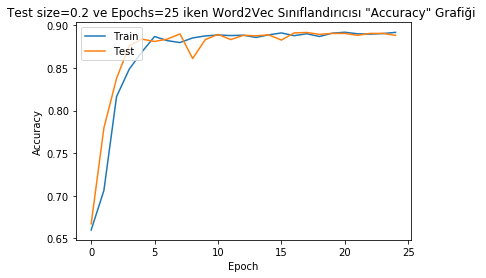

In [49]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test size=0.2 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Accuracy" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

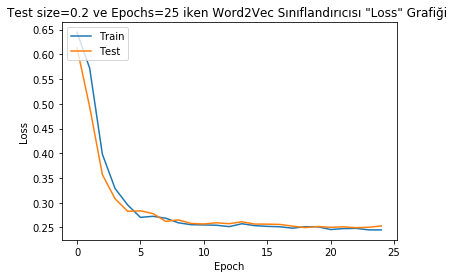

In [50]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test size=0.2 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Loss" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [52]:
model = Sequential()
model.add(word2vec_model.wv.get_keras_embedding(True))
model.add(LSTM(units=128))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 1500 samples, validate on 1500 samples
Epoch 1/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.6593 - accuracy: 0.6782 - val_loss: 0.6192 - val_accuracy: 0.6667
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6117 - accuracy: 0.6667 - val_loss: 0.5894 - val_accuracy: 0.6724
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5503 - accuracy: 0.7218 - val_loss: 0.4886 - val_accuracy: 0.7718
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4462 - accuracy: 0.8011 - val_loss: 0.3887 - val_accuracy: 0.8247
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3766 - accuracy: 0.8302 - val_loss: 0.3550 - val_accuracy: 0.8371
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3447 - accuracy: 0.8398 - val_loss: 0.3198 - val_accuracy: 0.8800
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3169 - acc

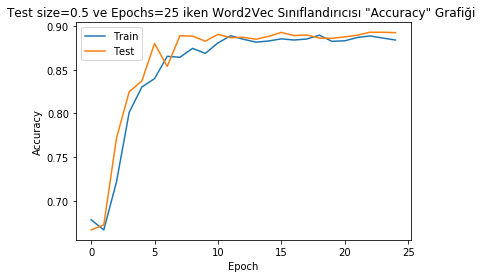

In [53]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test size=0.5 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Accuracy" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

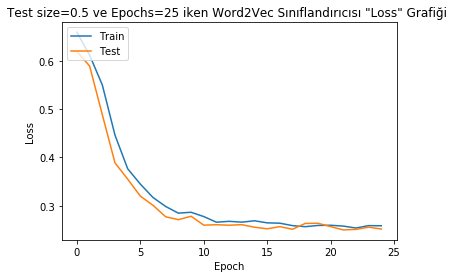

In [54]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test size=0.5 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Loss" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 0)

In [56]:
model = Sequential()
model.add(word2vec_model.wv.get_keras_embedding(True))
model.add(LSTM(units=128))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 900 samples, validate on 2100 samples
Epoch 1/25
900/900 [==============================] - 8s 8ms/step - loss: 0.6786 - accuracy: 0.6378 - val_loss: 0.6332 - val_accuracy: 0.6667
Epoch 2/25
900/900 [==============================] - 3s 4ms/step - loss: 0.6246 - accuracy: 0.6667 - val_loss: 0.6201 - val_accuracy: 0.6670
Epoch 3/25
900/900 [==============================] - 3s 3ms/step - loss: 0.6104 - accuracy: 0.6867 - val_loss: 0.6039 - val_accuracy: 0.7032
Epoch 4/25
900/900 [==============================] - 3s 3ms/step - loss: 0.5847 - accuracy: 0.7241 - val_loss: 0.5621 - val_accuracy: 0.7484
Epoch 5/25
900/900 [==============================] - 3s 3ms/step - loss: 0.5325 - accuracy: 0.7478 - val_loss: 0.5019 - val_accuracy: 0.7700
Epoch 6/25
900/900 [==============================] - 3s 3ms/step - loss: 0.4585 - accuracy: 0.7937 - val_loss: 0.4160 - val_accuracy: 0.8083
Epoch 7/25
900/900 [==============================] - 3s 3ms/step - loss: 0.3913 - accuracy: 0.8174 -

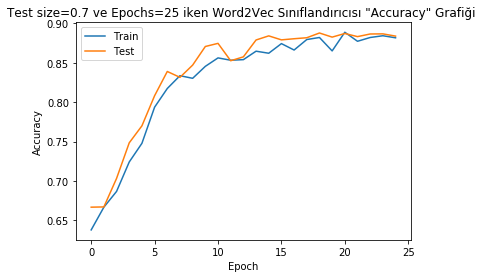

In [57]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test size=0.7 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Accuracy" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

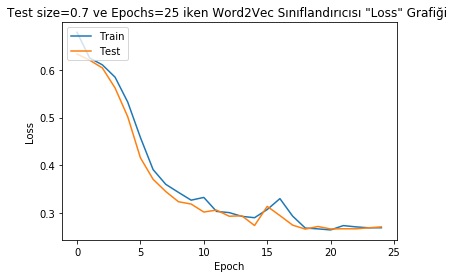

In [58]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test size=0.7 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Loss" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()